# $I_{SC}$ - Distance

In [ ]:
# draw chart I_sc - d 
# d with respect to cm
# for get a linear chart we should insert distance in a upper power d^n

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


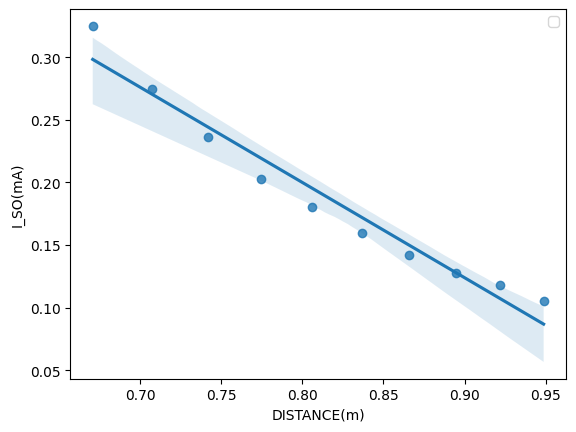

Eq1: y = 0.809 + -0.761x


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy




# create set of data
I_SO = np.array([0.105, 0.118, 0.128, 0.142, 0.160, 0.180, 0.203, 0.236, 0.275, 0.325]) # IN MILLI AMPER UNIT

DISTANCE = np.array([0.9, 0.85, 0.80, 0.75,0.70, 0.65, 0.60, 0.55, 0.50, 0.45])**0.5 # IN METER UNIT

df = pd.DataFrame({'DISTANCE(m)':DISTANCE, 'I_SO(mA)':I_SO})

#create regplot
p = sns.regplot(data=df, x=df['DISTANCE(m)'], y=df['I_SO(mA)'])

#calculate slope and intercept of regression equation we use slop and intercept in equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#add regression equation to plot
equation1 = 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x'


# define amounts of error for each point:

# I_SO_ERROR = np.array([0.00004, 0.00002, 0.00002, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001]) # Amper
# DISTANCE_ERROR = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]) # m

# plt.errorbar(I_SO, DISTANCE, yerr= I_SO_ERROR, xerr= DISTANCE_ERROR, fmt= '-o')

plt.savefig('I_SO')

plt.legend()
plt.show()


print(F"Eq1: {equation1}")

# IV-R

### now we are going to define our datasets 

In [2]:
# IN MILLI AMPER UNIT
I = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.39, 0.39, 0.39, 0.38, 0.39, 0.39, 0.36, 0.28, 0.16, 0.07, 0.03, 0.02, 0.01])

# IN Volt UNIT
V = np.array([0.6*0.001, 1.0*0.001, 2.4*0.001, 4.10*0.001, 8.20*0.001, 20.60*0.001, 7.20*0.001,
               46.8*0.001, 166.0*0.001, 0.39, 0.78, 1.81, 2.82, 3.43, 3.71, 3.80, 3.85, 3.87])
R = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000])

IV = I*V

C:\Users\Saeed\AppData\Local\Temp\ipykernel_14228\347233035.py:18: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


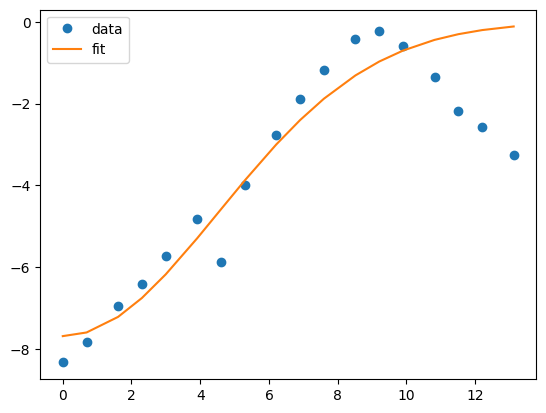

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


## x-axis for the plot
xdata = np.log(R)
ydata = np.log(I*V)



# Recast xdata and ydata into numpy arrays so we can use their handy features

# plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata)
  
fit_A = parameters[0]
fit_B = parameters[1]
  
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.savefig("Gaussian fit")
plt.legend()

### because gaussian curve dose not fit on our data points; we gonna use other ways to fit curve.
### first of all we use cubic spline method:

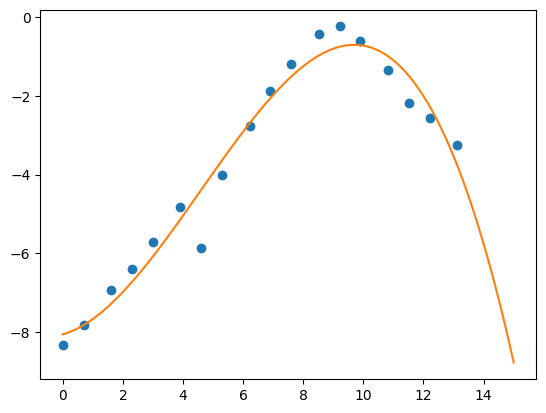

In [4]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

xdata = np.log(R)
ydata = np.log(I*V)

s = UnivariateSpline(xdata, ydata, s=5)
xs = np.linspace(0, 15, 100)
ys = s(xs)





plt.plot(xdata, ydata, 'o')
plt.plot(xs, ys)
plt.savefig("Spline fit")
plt.show()

### results makes our satisfaction. in a another try we could use polynomial functions in different orders. 

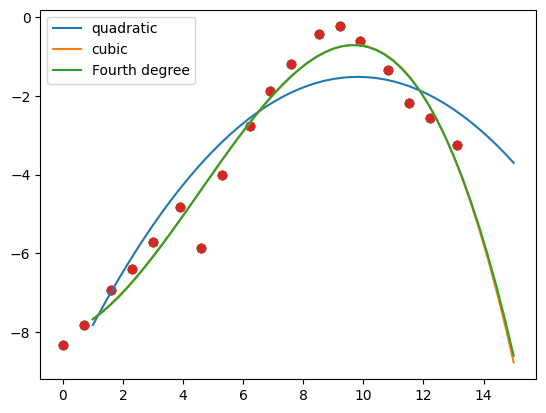

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


## x-axis for the plot
xdata = np.log(R)
ydata = np.log(I*V)

plt.scatter(xdata, ydata)
model2 = np.poly1d(np.polyfit(xdata, ydata, 2))
polyline = np.linspace(1, 15, 50)
plt.scatter(xdata, ydata)
plt.plot(polyline, model2(polyline),  '-', label='quadratic')


model3 = np.poly1d(np.polyfit(xdata, ydata, 3))
polyline = np.linspace(1, 15, 50)
plt.scatter(xdata, ydata)
plt.plot(polyline, model3(polyline),  '-', label='cubic')



model4 = np.poly1d(np.polyfit(xdata, ydata, 4))
polyline = np.linspace(1, 15, 50)
plt.scatter(xdata, ydata)
plt.plot(polyline, model4(polyline),  '-', label='Fourth degree')


plt.savefig('quadratic, cubic, Fourth degree, curve fit')
plt.legend()
plt.show()


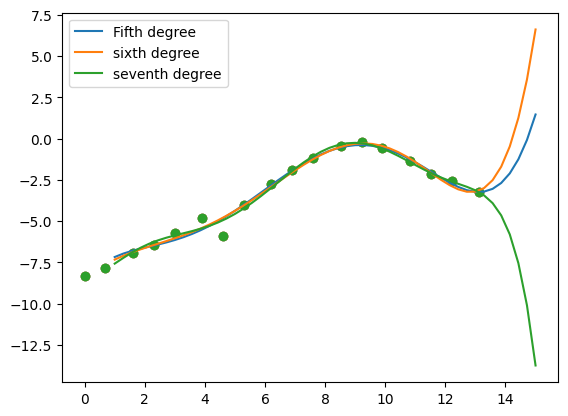

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


## x-axis for the plot
xdata = np.log(R)
ydata = np.log(I*V)


model5 = np.poly1d(np.polyfit(xdata, ydata, 5))
polyline = np.linspace(1, 15, 50)
plt.scatter(xdata, ydata)
plt.plot(polyline, model5(polyline),  '-', label='Fifth degree')


model6 = np.poly1d(np.polyfit(xdata, ydata, 6))
polyline = np.linspace(1, 15, 50)
plt.scatter(xdata, ydata)
plt.plot(polyline, model6(polyline),  '-', label='sixth degree')



model7 = np.poly1d(np.polyfit(xdata, ydata, 7))
polyline = np.linspace(1, 15, 50)
plt.scatter(xdata, ydata)
plt.plot(polyline, model7(polyline),  '-', label='seventh degree')


plt.savefig('fifth degree, sixth degree, seventh degree, curve fit')
plt.legend()
plt.show()


In [10]:

print(F"quadratic Ep: {model2}")
print(F"cubic Eq: {model3}")
print(F"Fourth degree Eq: {model4} ")
print(F"Fifth degree Eq: {model5}")
print(F"sixth degree Eq: {model6}")
print(F"seventh degree Eq: {model7}")

          2
-0.08125 x + 1.595 x - 9.341
         3          2
-0.0139 x + 0.1913 x + 0.2119 x - 8.063
           4           3          2
7.066e-05 x - 0.01576 x + 0.2066 x + 0.1702 x - 8.043
           5           4          3          2
0.0006476 x - 0.02122 x + 0.2301 x - 0.9615 x + 2.139 x - 8.558
           6            5            4           3         2
4.977e-05 x - 0.001319 x + 0.007978 x + 0.02954 x - 0.335 x + 1.424 x - 8.452
            7            6           5          4          3         2
-2.781e-05 x + 0.001326 x - 0.02434 x + 0.2144 x - 0.9245 x + 1.773 x - 0.3043 x - 8.306


# I-cos^2(theta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


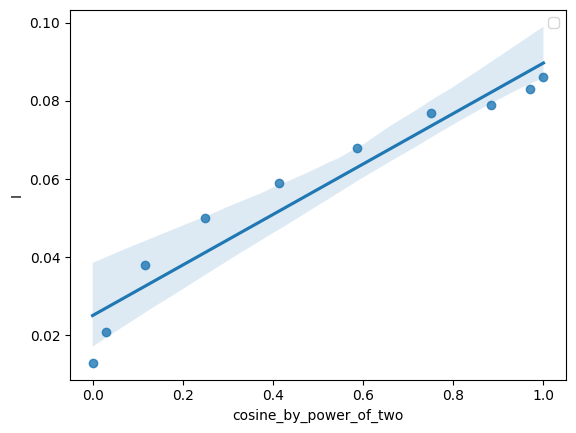

Eq2: y = 0.025 + 0.065x


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
import pandas as pd
import scipy




I_o = np.array([0.086, 0.083, 0.079, 0.077, 0.068, 0.059, 0.050, 0.038, 0.021, 0.013])
theta = np.array([0, pi/18, pi/9, pi/6, 40*pi/180, 50*pi/180, pi/3, 70*pi/180, 80*pi/180, pi/2])
cos2 = np.cos(theta)**2





df = pd.DataFrame({'cosine_by_power_of_two':cos2, 'I':I_o})
                  
#create regplot
p = sns.regplot(data=df, x=df.cosine_by_power_of_two, y=df.I)

#calculate slope and intercept of regression equation we use slop and intercept in equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#add regression equation to plot
equation2 = 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x'

plt.savefig("I-cos^2(theta) fig")
plt.legend()
plt.show()


print(F"Eq2: {equation2}")